### Python Curve Fitting Packge

This package is in scipy (Scientific Python)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Let's look at how this work with an exponential growth data. <br>

Number of Deaths in California due to Covid and Number of Cases<br>
Downloaded from, https://data.ca.gov/group/covid-19 <br>
This day contains Deaths and Cases for Covid-19 since March 2020.<br>




In [68]:
from numpy import loadtxt, linspace
Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

for irow in range(10):
    print("First 10 data points", Deaths[irow], Cases[irow])
    
for irow in range(-11,-1):
    print("Last 10 data points", Deaths[irow], Cases[irow])


First 10 data points 47507 3416147
First 10 data points 47107 3412057
First 10 data points 47043 3406365
First 10 data points 46843 3399878
First 10 data points 46435 3391036
First 10 data points 46002 3381615
First 10 data points 45456 3371556
First 10 data points 44995 3362981
First 10 data points 44477 3354591
First 10 data points 44150 3346340
Last 10 data points 5 252
Last 10 data points 4 202
Last 10 data points 4 202
Last 10 data points 0 157
Last 10 data points 0 133
Last 10 data points 0 114
Last 10 data points 0 88
Last 10 data points 0 69
Last 10 data points 0 60
Last 10 data points 0 53


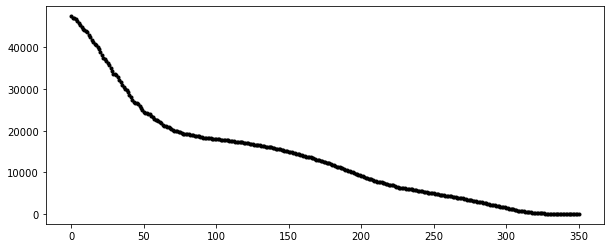

In [9]:
from pylab import plot,show, figure
tdays = range(0,len(Deaths))

figure(figsize=(10,4))
plot(tdays,Deaths,"k.")
show()

Notice that the values are backward from what we want. The data goes backward in time to Marth 4th 2020.<br>
This can be fix with a numpy function flip!

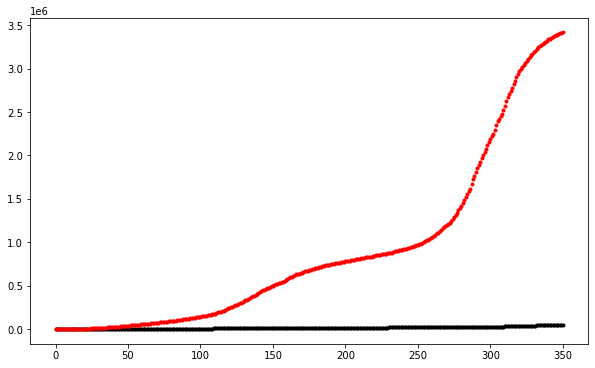

In [13]:
from numpy import loadtxt, flip
Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

from pylab import plot,show, figure

Deaths=flip(Deaths)
Cases=flip(Cases)
tdays = range(0,len(Deaths))

figure(figsize=(10,6))
plot(tdays,Deaths,"k.")
plot(tdays,Cases,"r.")
show()

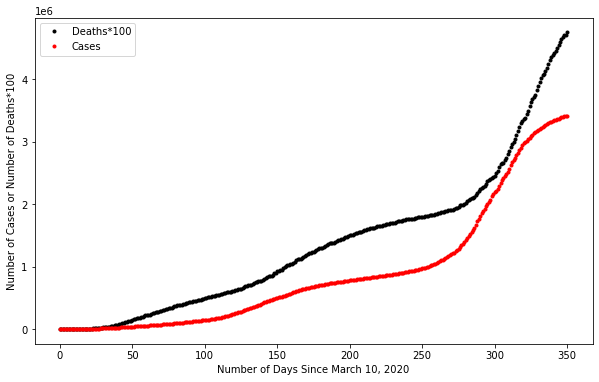

In [12]:
# Notice that the number of deaths is very small compared to cases.
# we can scale the number of deaths so we can see on the plot more easily 
# But we HAVE TO LABEL it so people don't think there's 100,000 deaths...

from numpy import loadtxt, flip
from pylab import plot,show,legend,figure, xlabel, ylabel

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)
Deaths=flip(Deaths)
Cases=flip(Cases)
tdays = range(0,len(Deaths))


figure(figsize=(10,6))
plot(tdays,Deaths*100,"k.",label="Deaths*100")
plot(tdays,Cases,"r.",label="Cases")
xlabel("Number of Days Since March 10, 2020")
ylabel("Number of Cases or Number of Deaths*100")
legend()
show()

## Uncertainties in Data
Typically each data point will come with an uncertainty that has to be measured<br>

For example, in the rod length measurement quoted the value to be $L = 9.9 \pm1.0 \pm0.5 cm$<br>

Since this dataset is only counting the number of cases and deaths. We don't really have a systematic uncertainty.<br> 

We can evaluation the statistical uncertainty using Poisson statistics or Gaussian Staistics.<br>

Let's start with Poisson Statistic (the more correct one).

$$ P_{Poisson} = \frac{\mu^r exp(-\mu)}{r!}$$

<img src="Poisson.png">
Source:https://depts.washington.edu/imreslab/2011%20Lectures/ErrorProp-CountingStat_LRM_04Oct2011.pdf

$\mu$ is the mean from your measurement. P(r) can give you the probability of measuring r with that given mean, $\mu$.<br>

The variance = the mean in a Poisson distribution so we can calculate the stadnard error using,

$$ \delta \mu = \sqrt{\mu}$$

This number isn't really correct for low number of events, such as $\mu = 1.0$, we can see that the data does not vary symmetrically around 1.0. To actually get the asymmetric errors we need to integrate to the left until we get 68.27\%/2. Then do the same going to right for a given Poisson distribution. So for a given $\mu$ you'll have to generate a poisson and calculate how far you have to move r to get the $\pm1 \sigma$ coverage.<br>

There are shortcuts to this by shifting the errors up and down slightly on both sides,<br>
$$ \sigma_+ = 0.5 + \sqrt{N+0.25}$$
$$ \sigma_- = -0.5 + \sqrt{N+0.25}$$

On the table below, we can use it gives almost the 68.27\% coverage we want.<br>

|N | low      | high     |coverage|
|- |--------- | ---------|--------|
|0 |0.000000  |1.000000  |0.632121|
|0 |0.000000  |1.000000  |0.632121|
|1 |0.381966  |2.618034  |0.679295|
|2 |1.000000  |4.000000  |0.681595|
|3 |1.697224  |5.302776  |0.682159|
|4 |2.438447  |6.561553  |0.682378|
|5 |3.208712  |7.791288  |0.682485|
|6 |4.000000  |9.000000  |0.682545|
|7 |4.807418  |10.192582 |0.682582|
|8 |5.627719  |11.372281 |0.682607|
|9 |6.458619  |12.541381 |0.682624|


Poisson Statistics is for low number of counts say between 3 to 9, but as the number of counts goes up it can be closely estimate by Gaussian Statistics<br>

$$ P_{Gaus} = \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{-(r-\mu)^2}{2\sigma^2})$$

<img src="GaussianStat.png">
For the Gaussian case, $\delta N = \sqrt N$ exactly. Which we can use when the number of counts is above 10.<br>


We can calculate this in the Covid Data, there are some data points with Poisson Errors but it will have a very small effect since majority of the data will have counts greater than 10.


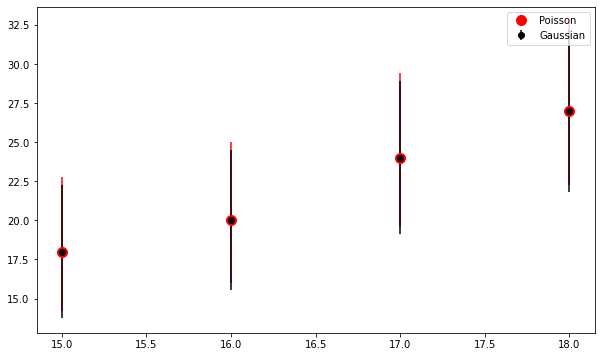

In [77]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 15
dayMax = 19
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='red',ms=10,mec='red',ecolor='red',label="Poisson")
errorbar(tdays,Deaths[dayMin:dayMax],
         ErrDeaths[dayMin:dayMax],
        ls='',marker='o', mfc='black',ms=6,mec='black',ecolor='black',label="Gaussian")
    
legend()
show()

[-5.78266396  2.22442729  0.15751404]


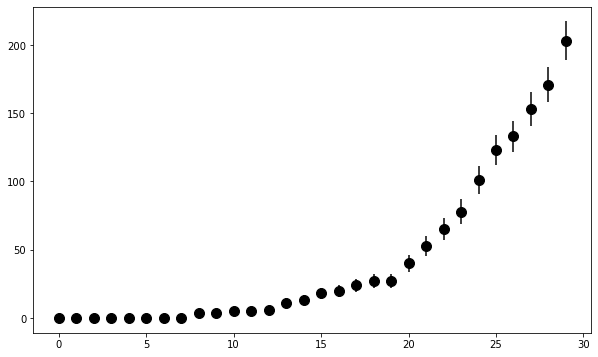

In [101]:
from numpy import loadtxt, flip, sqrt
from pylab import show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
#errorbar(tdays,Deaths[dayMin:dayMax],
#        [  ErrLowDeaths[dayMin:dayMax],ErrHighDeaths[dayMin:dayMax]],
#         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
errorbar(tdays,Deaths[dayMin:dayMax],
         ErrDeaths[dayMin:dayMax],
        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    
#legend()
#show()

from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(t,a,b,c):
    return a+b*exp(c*t)

param0 = (1,10,1)
paramfit, paramErr = curve_fit(myfit ,
                               tdays,
                               Deaths[dayMin:dayMax],
                               param0)
print(paramfit)
#print(paramErr)

### Overlaying the Fit to your data

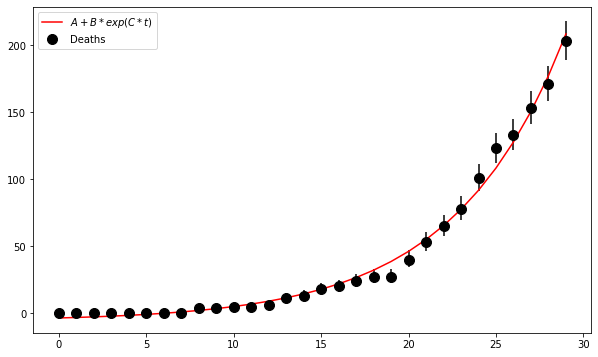

[-5.78265685  2.22442536  0.15751407]


In [105]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
#errorbar(tdays,Deaths[dayMin:dayMax],
#         ErrDeaths[dayMin:dayMax],
#        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    


from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(x,a,b,c):
    return a+b*exp(c*x)

param0 = (0,100,0.1)
paramfit, paramErr = curve_fit(myfit,tdays,
                               Deaths[dayMin:dayMax],
                               param0)

fitfun = myfit(tdays,paramfit[0],paramfit[1],paramfit[2])


plot(tdays,fitfun,"r",label="$A+B*exp(C*t)$")

legend()

show()

print(paramfit)

### Including Uncertainties in your fit.
Notice that the uncertainties in the data did not when into the fitting the functiona at all yet.

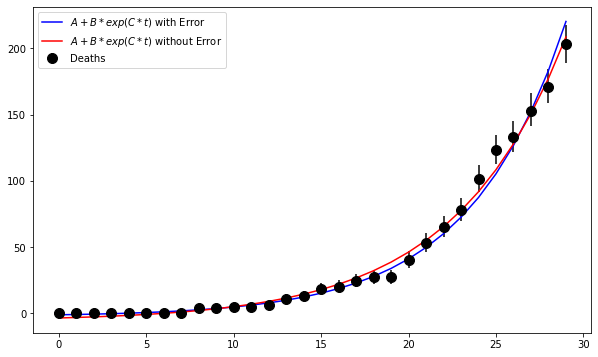

[-2.30131603  1.14242438  0.18178811]
[-5.78265685  2.22442536  0.15751407]


In [110]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
#errorbar(tdays,Deaths[dayMin:dayMax],
#         ErrDeaths[dayMin:dayMax],
#        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    



from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(x,a,b,c):
    return a+b*exp(c*x)

# make a list of the parameter's initial values

# a ~ -b
param0 = (0,100,0.1)
paramfitWithErr, paramErr = curve_fit(myfit,tdays,Deaths[dayMin:dayMax],
                               param0,sigma=ErrHighDeaths[dayMin:dayMax])

fitfunWithError = myfit(tdays,paramfitWithErr[0],paramfitWithErr[1],paramfitWithErr[2])
plot(tdays,fitfunWithError,"b",label="$A+B*exp(C*t)$ with Error")
plot(tdays,fitfun,"r",label="$A+B*exp(C*t)$ without Error")
legend()
show()

print(paramfitWithErr)
print(paramfit)

## Covariant Matrix to Uncertanties

This matrix will be N-parameter by N-parameter. The uncertainties in each parameters can be read out on the diagonal if we just square it it. $\delta p_i = cov[i,i]$.

In [108]:
print("Best fit value for a =", paramfitWithErr[0], "+/- ",sqrt(paramErr[0,0]))
print("Best fit value for b =", paramfitWithErr[1], "+/- ",sqrt(paramErr[1,1]))
print("Best fit value for c =", paramfitWithErr[2], "+/- ",sqrt(paramErr[2,2]))

Best fit value for a = -2.301316025979903 +/-  0.46820445223318996
Best fit value for b = 1.1424243781627903 +/-  0.18448526258012357
Best fit value for c = 0.18178811321022761 +/-  0.006240413901366032


## Interpeting the fit values

The fit function is: 
$$ N(t) = a + b~exp(c*t)$$

1/c should be the time constant of the exponential growth. It is kind of the opposite of time constant of an exponential decay. Which is also related to the half-life.<br>

$$ \tau = t_{1/2}*\sqrt2$$

If our case, we have the "double-time",
$$ \tau = 1/0.18 = 5.6 $$
$$ t_{double} = \tau / \sqrt2 = 4~days $$

This means the number of deaths doubles every 4 days.

## Extrapolating the function into the future.
We the fit function in place we can use it to extropolate what would have happen if California did not respond to the virus. <br> 

In [109]:
print("Extrapolated Cases of Covid if no intervention in California %.0f" 
      %myfit(100,paramfitWithErr[0],paramfitWithErr[1],paramfitWithErr[2]))

Extrapolated Cases of Covid if no intervention in California 89698441
